<a href="https://colab.research.google.com/github/Jorgemontanez25/Linear-Regression-Project-Tutorial/blob/main/Linear_Regression_Project_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting the cost of health insurance for a person**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

dataframe = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
print(dataframe.shape)
print(dataframe.info())
dataframe.head()

(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


El dataset contiene 1338 en 7 variables, de las cuales la variable dependiente es la variable charges; el dataset cuenta con 3 variables categoricas y 4 numericas.

*Duplicates*

In [2]:
dataframe = dataframe.drop_duplicates().reset_index(drop = True)
print(dataframe.shape)
dataframe.head()

(1337, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Despues de utilizar la funcion drop_duplicates() podemos observar que e numero de elementos redujo de 1338 a 1337, lo cual nos indica que habias una fila duplicada la cual fue eliminada.

*Revision de variables*

*Variables Categoricas*

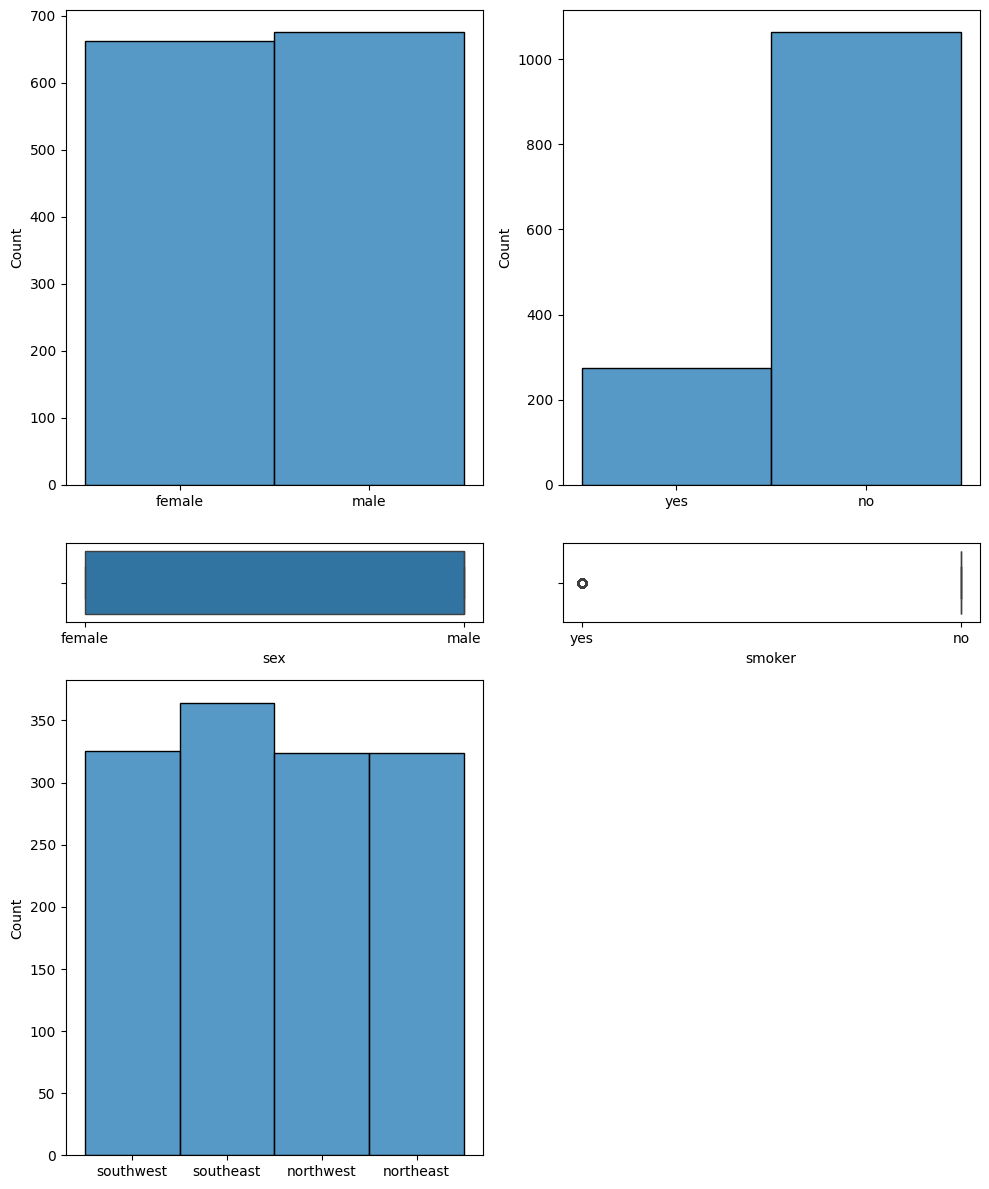

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with specified height ratios
fig, axis = plt.subplots(3, 2, figsize=(10, 12), gridspec_kw={'height_ratios':[6,1,6]})

# Plot histogram and boxplot for 'sex'
sns.histplot(ax=axis[0,0], data=dataframe, x="sex").set(xlabel=None)
sns.boxplot(ax=axis[1,0], data=dataframe, x="sex")

# Plot histogram and boxplot for 'smoker'
sns.histplot(ax=axis[0,1], data=dataframe, x="smoker").set(xlabel=None)
sns.boxplot(ax=axis[1,1], data=dataframe, x="smoker")

# Plot histogram and boxplot for 'region'
sns.histplot(ax=axis[2,0], data=dataframe, x="region").set(xlabel=None)
sns.boxplot(ax=axis[2,1], data=dataframe, x="region")

# Adjust layout and display the plot
fig.delaxes(axis[-1,-1])
plt.tight_layout()
plt.show()




*Variables Numericas*

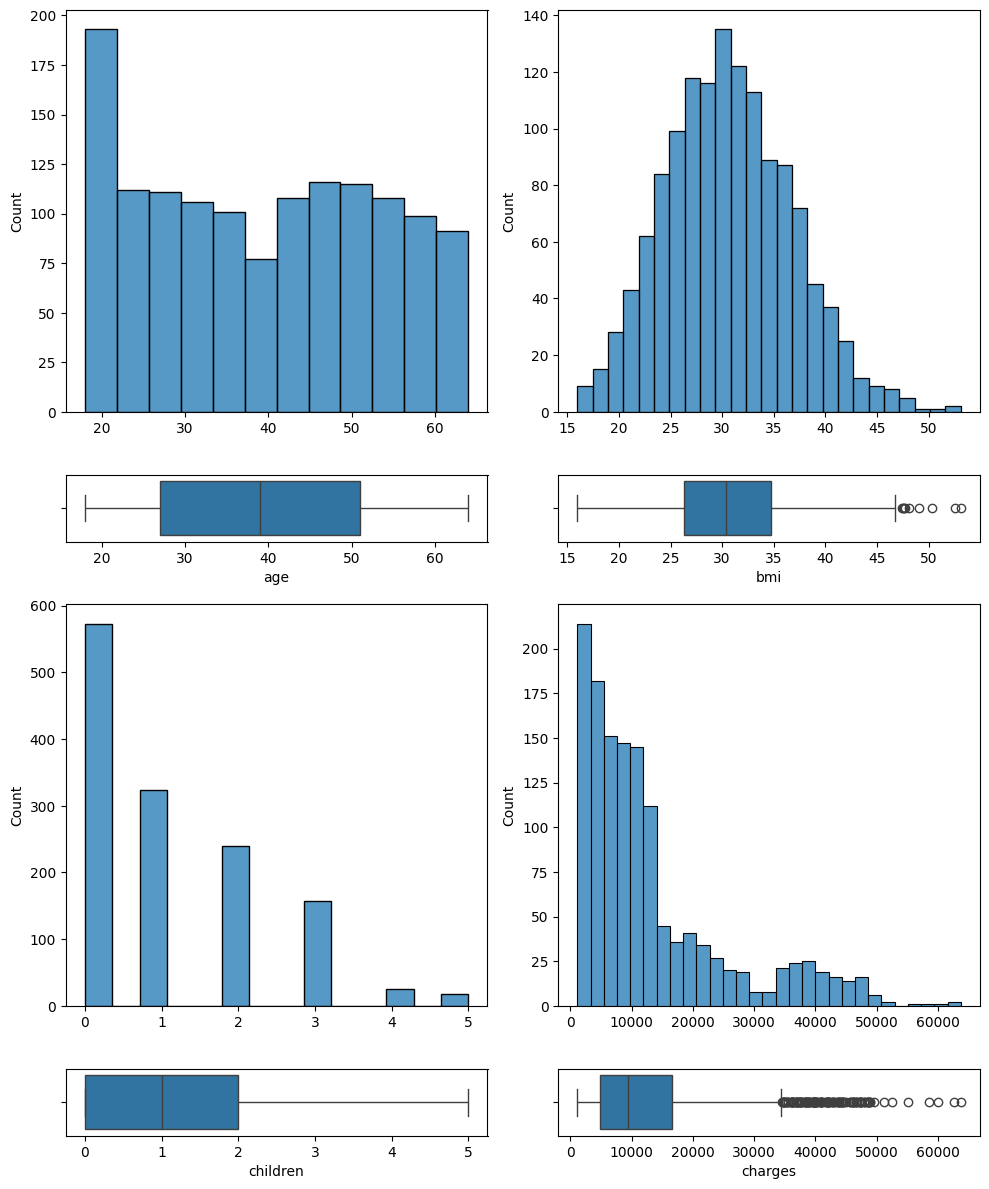

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with specified height ratios
fig, axis = plt.subplots(4, 2, figsize=(10, 12), gridspec_kw={'height_ratios':[6,1,6,1]})

# Plot histogram and boxplot for 'age'
sns.histplot(ax=axis[0,0], data=dataframe, x="age").set(xlabel=None)
sns.boxplot(ax=axis[1,0], data=dataframe, x="age")

# Plot histogram and boxplot for 'bmi'
sns.histplot(ax=axis[0,1], data=dataframe, x="bmi").set(xlabel=None)
sns.boxplot(ax=axis[1,1], data=dataframe, x="bmi")

# Plot histogram and boxplot for 'children'
sns.histplot(ax=axis[2,0], data=dataframe, x="children").set(xlabel=None)
sns.boxplot(ax=axis[3,0], data=dataframe, x="children")

# Plot histogram and boxplot for 'charges'
sns.histplot(ax=axis[2,1], data=dataframe, x="charges").set(xlabel=None)
sns.boxplot(ax=axis[3,1], data=dataframe, x="charges")

# Adjust layout and display the plot

plt.tight_layout()
plt.show()


Con ayuda de los graficos podemos observar los datos que contienen nuestras variables y su frecuencia, al igual que podemos ver cuales cuentan con valores atipicos.

*Conversion de variables categoricas a numericas*

In [5]:
dataframe.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Define the categorical variables to be factorized
categorical_variables = ['sex', 'smoker', 'region']

# Factorize categorical variables and add them as new columns
for column in categorical_variables:
    dataframe[f"{column}_n"] = pd.factorize(dataframe[column])[0]

# Define numerical variables along with the categorical ones
num_variables = ['age', 'sex_n', 'bmi', 'children', 'smoker_n', 'region_n', 'charges']

# Scale numerical variables using MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(dataframe[num_variables])

# Create a DataFrame with scaled features
dataframe_scal = pd.DataFrame(scaled_features, index=dataframe.index, columns=num_variables)


# Display the first few rows of the scaled DataFrame
dataframe_scal.head()

,age,sex_n,bmi,children,smoker_n,region_n,charges
0,0.021739,0.0,0.321227,0.0,0.0,0.000000,0.251611
1,0.000000,1.0,0.479150,0.2,1.0,0.333333,0.009636
2,0.217391,1.0,0.458434,0.6,1.0,0.333333,0.053115
3,0.326087,1.0,0.181464,0.0,1.0,0.666667,0.333010
4,0.304348,1.0,0.347592,0.0,1.0,0.666667,0.043816


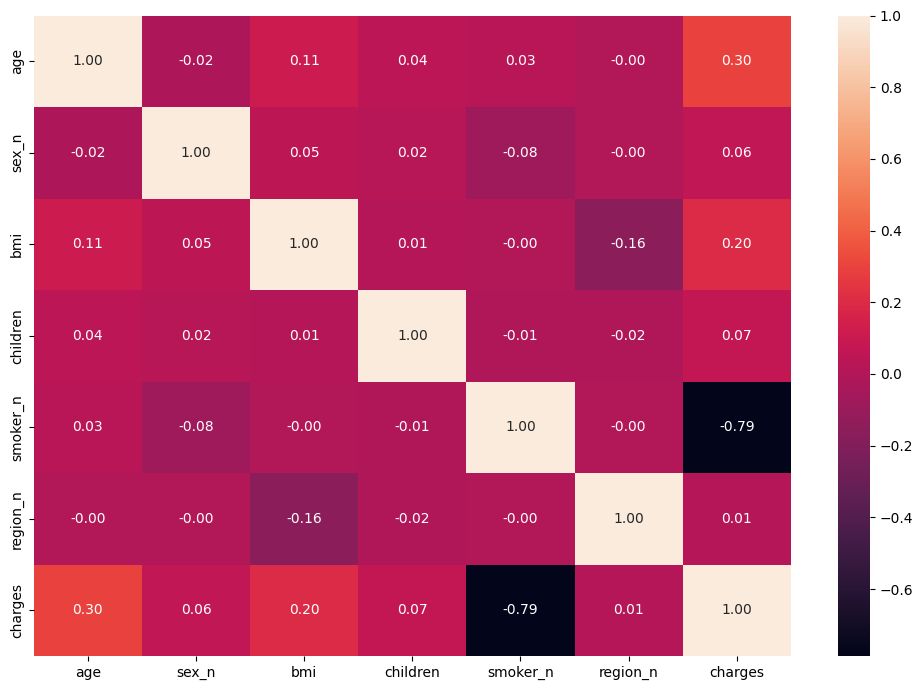

In [7]:
plt.figure(figsize=(10,7))

sns.heatmap(dataframe_scal[['age', 'sex_n', 'bmi', 'children', 'smoker_n', 'region_n', 'charges']].corr(), annot=True, fmt='.2f')

plt.tight_layout()

plt.show()

Luego de transformar las variabes categoricas a numericas y realizar el scalado de las pariables independientes podemos observar unas relaciones bastante altas con la variable dependinte 'charges'; la mas alta aunque negativa la encntramos con la variable 'smoke' con un -79%, lo cual es bastante logico ya que el fumar es una de las causas de enfermedades graves respiratorias; seguido con un 30% la variable 'age' lo cual igual me parece logico, ya que mientras mas grande sea el individuo mas probabilidades de desarrollar enfermedades tiene; despues con un 20% tenemos el 'bmi' (body mass index), de igual manera muy logico ya que el bmi nos puede indicar si el individuo cuenta con sobrepeso o se encuentra por debajo de el; las variables 'sex' y 'children' tienen un bajo porcentaje de relacion pero me quedare con ellas ya que el sex considero que es importante ya que dependiendo del sexo pueden venir diferentes enfermedades, y children porque en el caso de ser mujer puede representar un mayor desgaste al cuerpo; la variable 'region' tiene la menor relacion con 'charges', pero tiene una relacion considerable del 16% con bmi, puedo pensar que los habitos alimenticios de cada region afecta el bmi de las personas, pero ya seria algo redundante asi que  no conservare la variable 'region'

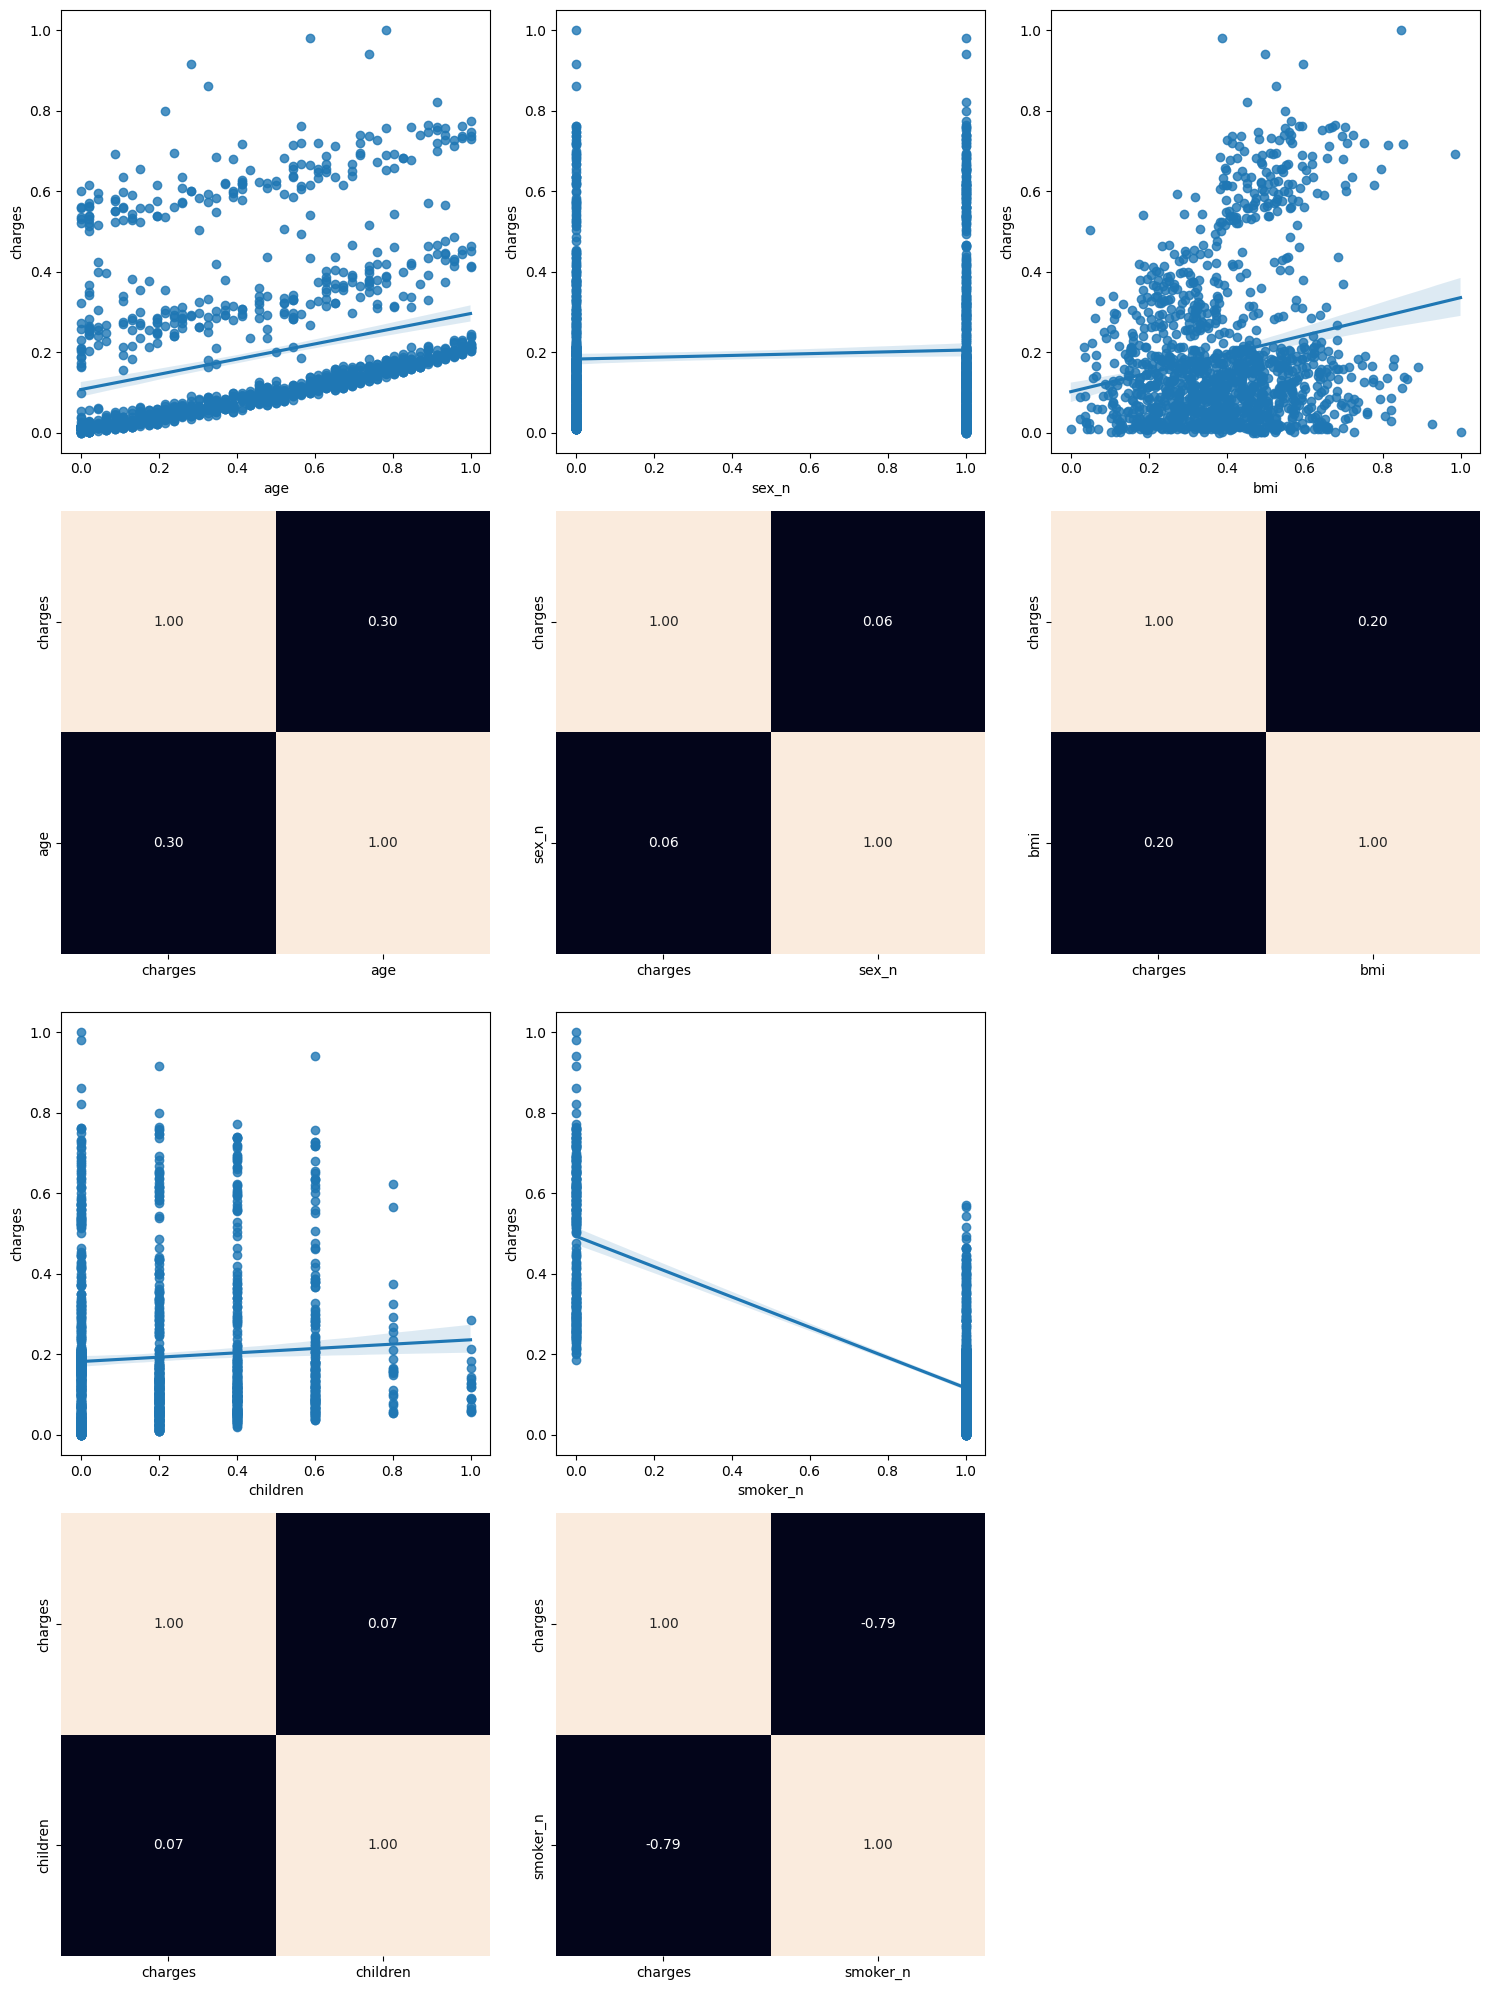

In [8]:
fig, axis = plt.subplots(4, 3, figsize=(15, 20))

sns.regplot(ax=axis[0,0], data=dataframe_scal, x="age", y="charges")
sns.heatmap(dataframe_scal[['charges','age']].corr(), annot=True, fmt='.2f', ax=axis[1,0], cbar=False)

sns.regplot(ax=axis[0,1], data=dataframe_scal, x="sex_n", y="charges")
sns.heatmap(dataframe_scal[['charges','sex_n']].corr(), annot=True, fmt='.2f', ax=axis[1,1], cbar=False)

sns.regplot(ax=axis[0,2], data=dataframe_scal, x="bmi", y="charges")
sns.heatmap(dataframe_scal[['charges','bmi']].corr(), annot=True, fmt='.2f', ax=axis[1,2], cbar=False)

sns.regplot(ax=axis[2,0], data=dataframe_scal, x="children", y="charges")
sns.heatmap(dataframe_scal[['charges','children']].corr(), annot=True, fmt='.2f', ax=axis[3,0], cbar=False)

sns.regplot(ax=axis[2,1], data=dataframe_scal, x="smoker_n", y="charges")
sns.heatmap(dataframe_scal[['charges','smoker_n']].corr(), annot=True, fmt='.2f', ax=axis[3,1], cbar=False)

# Remove the empty subplot in the last column
fig.delaxes(axis[2,2])
fig.delaxes(axis[3,2])

plt.tight_layout()
plt.show()


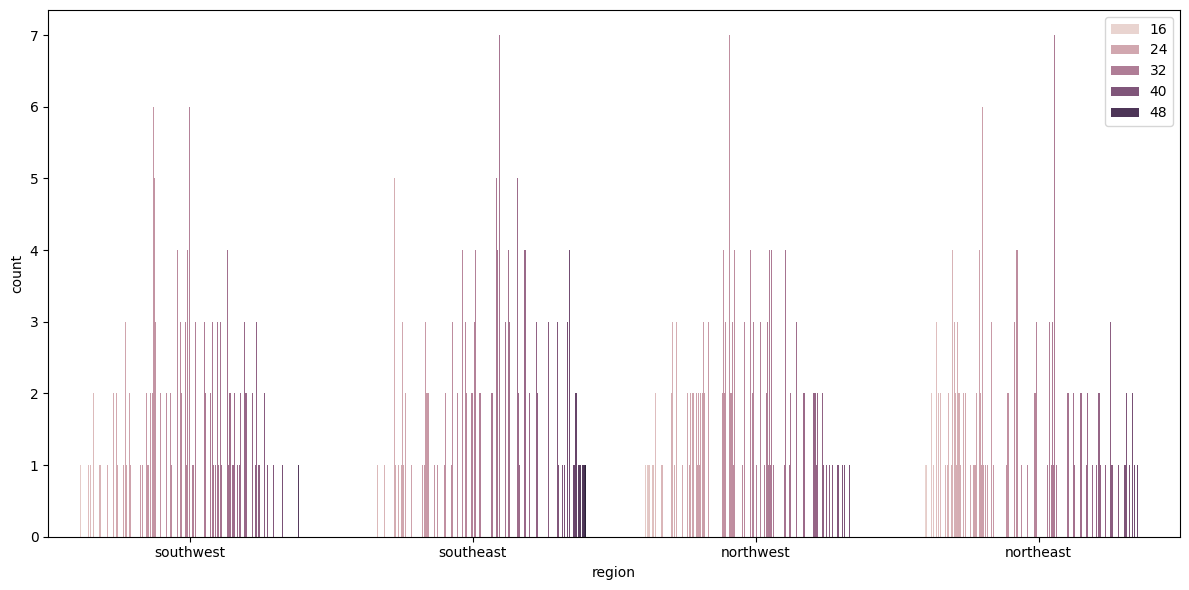

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(data=dataframe,x='region',hue='bmi')
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

In [10]:
dataframe_scal.drop(['region_n'], axis=1,inplace=True)
print(dataframe_scal.shape)
print(dataframe_scal.info())
dataframe_scal.head()

(1337, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   float64
 1   sex_n     1337 non-null   float64
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   float64
 4   smoker_n  1337 non-null   float64
 5   charges   1337 non-null   float64
dtypes: float64(6)
memory usage: 62.8 KB
None


,age,sex_n,bmi,children,smoker_n,charges
0,0.021739,0.0,0.321227,0.0,0.0,0.251611
1,0.000000,1.0,0.479150,0.2,1.0,0.009636
2,0.217391,1.0,0.458434,0.6,1.0,0.053115
3,0.326087,1.0,0.181464,0.0,1.0,0.333010
4,0.304348,1.0,0.347592,0.0,1.0,0.043816


In [11]:
# Feature selection

# Importing necessary libraries
from sklearn.feature_selection import SelectKBest, f_regression  # Importing the SelectKBest feature selection method and the f_regression scoring function
from sklearn.model_selection import train_test_split  # Importing train_test_split method to split the dataset into training and testing sets

# Extracting independent (X) and dependent (y) variables from the scaled dataframe
X = dataframe_scal.drop("charges", axis=1)  # Independent variables (features)
y = dataframe_scal["charges"]  # Dependent variable (target)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Using 80% of the data for training and 20% for testing

# Creating a SelectKBest object with f_regression scoring and selecting top 4 features
selection_model = SelectKBest(f_regression, k=4)  # Selecting the top 4 features based on their F-test scores
selection_model.fit(X_train, y_train)  # Fitting the selection model on the training data

# Getting the names of the selected columns
selected_columns = X_train.columns[selection_model.get_support()]  # Retrieving the names of the selected features

# Transforming the training and testing sets to include only the selected features
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=selected_columns)  # Creating a DataFrame with selected features for training set
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=selected_columns)  # Creating a DataFrame with selected features for testing set

# Displaying the first few rows of the transformed training set
X_train_sel.head()



,age,bmi,children,smoker_n
0,0.108696,0.230024,0.0,1.0
1,0.065217,0.263250,0.4,1.0
2,0.739130,0.580172,0.4,1.0
3,0.978261,0.686306,0.0,1.0
4,0.630435,0.286252,0.4,1.0


In [12]:
X_train_sel.head()

,age,bmi,children,smoker_n
0,0.108696,0.230024,0.0,1.0
1,0.065217,0.263250,0.4,1.0
2,0.739130,0.580172,0.4,1.0
3,0.978261,0.686306,0.0,1.0
4,0.630435,0.286252,0.4,1.0


In [13]:
# Add target variable 'charges' to the selected training features
X_train_sel["charges"] = y_train.values

# Add target variable 'charges' to the selected testing features
X_test_sel["charges"] = y_test.values

# Save the selected training features and target variable to a CSV file
X_train_sel.to_csv("clean_train.csv", index=False)

# Save the selected testing features and target variable to a CSV file
X_test_sel.to_csv("clean_test.csv", index=False)


In [14]:
train_data = pd.read_csv("clean_train.csv")
test_data = pd.read_csv("clean_test.csv")

train_data.head()

,age,bmi,children,smoker_n,charges
0,0.108696,0.230024,0.0,1.0,0.020339
1,0.065217,0.263250,0.4,1.0,0.034446
2,0.739130,0.580172,0.4,1.0,0.516374
3,0.978261,0.686306,0.0,1.0,0.196070
4,0.630435,0.286252,0.4,1.0,0.137177


In [15]:
test_data.head()

,age,bmi,children,smoker_n,charges
0,0.673913,0.176352,0.0,1.0,0.120785
1,0.239130,0.259349,0.8,1.0,0.073218
2,0.717391,0.549502,0.6,1.0,0.164646
3,0.282609,0.495830,0.6,0.0,0.600564
4,0.282609,0.603444,0.4,1.0,0.053335


In [16]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

*Linear Regresion implementation*

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercep (a): 0.3195827183308946
Coefficients (b1, b2): [ 0.1829699   0.18111814  0.04293572 -0.36780589]


*Prediccion del modelo*

In [19]:
y_pred = model.predict(X_test)
y_pred

array([ 0.10702315,  0.07685187,  0.2083241 ,  0.48685684,  0.12995459,
        0.19726353,  0.45755859,  0.00832554,  0.1556988 ,  0.16287349,
        0.14781084,  0.51037008,  0.4699569 ,  0.25944432,  0.14442757,
        0.13842465,  0.05134994,  0.49351746,  0.03848664,  0.0705325 ,
        0.04276279,  0.45855586,  0.22245537,  0.47182868,  0.47460549,
        0.06698449,  0.55116209,  0.5686984 ,  0.15588314,  0.20127518,
        0.0770878 ,  0.19051001, -0.00377298,  0.17967676,  0.61602286,
        0.18050297,  0.06028104,  0.0447116 ,  0.48287007,  0.13064786,
        0.08387671,  0.45610213,  0.54228697,  0.17124485,  0.09976616,
        0.03950023,  0.07028081,  0.12772953,  0.04874519,  0.13229562,
        0.09175793,  0.1653832 ,  0.47297483,  0.04437078,  0.16108797,
        0.14414371,  0.14902535,  0.02014774,  0.48426463,  0.13172362,
        0.2337337 ,  0.11691   ,  0.18103216,  0.00130779,  0.25281818,
        0.14612565,  0.14268127,  0.47671561,  0.38076578,  0.23

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

MSE: 0.009150574110332004
RMSE:0.09565863322425218
Coeficiente de determinación: 0.8045531086669286


EL modelo nos dio un MSE de un 0.009 y un RMSE de 0.09 valores muy bajos que son favorables para el modelo, asi mismo presenta un valor del $R^2$ de 80.04%, que un porcentaje no tan alto pero aceptable, y con ese porcentaje y los valores de MSE y RMSE, podemos decir que tenemos un modelo satisfactorio.